<a href="https://colab.research.google.com/github/kaanstudent/yapayzeka/blob/main/olumluOlumsuzYorum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import numpy as np
import re
import nltk
import pandas as pd
import nltk as nlp
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
stopWords = set(stopwords.words('turkish'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
df_train = pd.read_csv('/content/drive/MyDrive/BeyazPerde/train.csv', encoding= 'unicode_escape')
df_train.head()

,Unnamed: 0,comment,Label
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1


In [23]:
df_test = pd.read_csv('/content/drive/MyDrive/BeyazPerde/train.csv', encoding= 'unicode_escape')
df_test.head()

,Unnamed: 0,comment,Label
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1


In [24]:
def pre_processing(text):
    text = text.lower()  #Büyük harften -Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text=nltk.word_tokenize(text) # splits the words that are in the sentence from each other.
    text =[word for word in text if not word in set(stopwords.words("turkish"))]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text] # this code finds the root of the word for a word in the sentence and change them to their root form.
    text=" ".join(text)
    return text

In [25]:
df_train["clean_text"]=df_train["comment"].apply(lambda x: pre_processing(x))
df_test["clean_text"]=df_test["comment"].apply(lambda x: pre_processing(x))

In [26]:
df_train.head()

,Unnamed: 0,comment,Label,clean_text
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0,bana filmde benim anlamadigim bisey oldugunu s...
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1,çocuklar ilk filmin sonunda büyüdüler filmde b...
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0,film biraz uzun sürse harbi kiyameti görecektik
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0,pek orjinal bi cinayet yok orjinal oyuncular v...
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1,film tek kelimeyle muhtesemdi heleki sonundaki...


In [27]:
X_train=df_train["clean_text"]
X_test=df_test["clean_text"]
y_train=df_train["Label"]
y_test=df_test["Label"]

print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (7996,)
x_test (7996,)
y_train (7996,)
y_test (7996,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
LogisticRegression = Pipeline([('tfidf', TfidfVectorizer()),('clf', LogisticRegression())])

LogisticRegression .fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [29]:
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

CV average score: 0.89
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3998
           1       0.96      0.95      0.95      3998

    accuracy                           0.95      7996
   macro avg       0.95      0.95      0.95      7996
weighted avg       0.95      0.95      0.95      7996

Train Accuracy : 0.951
Test Accuracy : 0.951
0.951413060923382 : is the precision score
0.9513506753376688 : is the recall score
0.9513489944373248 : is the f1 score


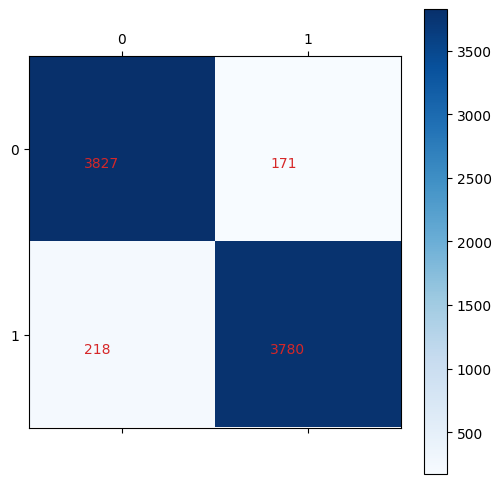

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

cv_scores = cross_val_score(LogisticRegression, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

result = LogisticRegression.predict(X_test)
cr = classification_report(y_test, result)
print(cr)


print('Train Accuracy : %.3f'%LogisticRegression.score(X_train, y_train))
print('Test Accuracy : %.3f'%LogisticRegression.score(X_test, y_test))



y_pred = LogisticRegression.predict(X_test)
print(precision_score(y_test, y_pred ,average='macro') , ": is the precision score")
print(recall_score(y_test, y_pred,average='macro'), ": is the recall score")
print(f1_score(y_test, y_pred ,average='macro'), ": is the f1 score")

plot_confusion_matrix(y_test, LogisticRegression.predict(X_test))

In [31]:
!pip install requests
!pip install html5lib
!pip install bs4

In [38]:
import requests
from bs4 import BeautifulSoup
import csv

#URL="https://www.beyazperde.com/filmler/film-255999/kullanici-elestirileri/"
URL="https://www.beyazperde.com/filmler/film-1000008835/kullanici-elestirileri/"

# Add headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
r = requests.get(URL, headers=headers)

# Check if the request was successful
if r.status_code == 200:
    soup = BeautifulSoup(r.content, 'html.parser')

    # Find all divs with the specific class
    review_divs = soup.find_all("div", {"class": "content-txt review-card-content"})

    # Extract the text from each div
    comment_list = [div.text for div in review_divs]

    # Print the first comment (if available)
    if comment_list:
        print(comment_list[0])
    else:
        print("No comments found with the specified class.")
else:
    print(f"Request failed with status code: {r.status_code}")


8 yıl önce kurduğumuz Sinema Whatsapp gurubumuza yeni dostlarımızı bekliyoruz. Gurubumuzda kesinlikle spoiler, küfür, üçüncü şahısa hakaret veya rahatsız etme yok, olduğu takdirde hukuki işlemler ile sonuna kadar hakkımızı arıyoruz. Gelmek isteyen bu bilinçle gelebilir. Guruba dahil olmak için aşağıdaki whatsapp linkine tıklamanız yeterlihttps://chat.whatsapp.com/C5LbEUHA9dxIK8mGCVvbnC



In [39]:
positive_count = 0
negative_count = 0
for i in range(len(comment_list)):
  prediction=LogisticRegression.predict([comment_list[i]])
  proportion=LogisticRegression.predict_proba([comment_list[i]])

  if prediction[0]==1:
    print(comment_list[i]," is: ",proportion[0][1]," Positive")
    positive_count += 1
  elif prediction[0]==0:
    print(comment_list[i]," is: ",proportion[0][0]," Negative")
    negative_count += 1
  else:
    print(comment_list[i]," is: ",proportion[0][0]," Neutral")


8 yıl önce kurduğumuz Sinema Whatsapp gurubumuza yeni dostlarımızı bekliyoruz. Gurubumuzda kesinlikle spoiler, küfür, üçüncü şahısa hakaret veya rahatsız etme yok, olduğu takdirde hukuki işlemler ile sonuna kadar hakkımızı arıyoruz. Gelmek isteyen bu bilinçle gelebilir. Guruba dahil olmak için aşağıdaki whatsapp linkine tıklamanız yeterlihttps://chat.whatsapp.com/C5LbEUHA9dxIK8mGCVvbnC
  is:  0.688649418997392  Negative

Bu, 2 yıldan uzun süredir katılmaya çalıştığım ancak dolandırıcıların benden birkaç kez para aldığı yeni dünya düzenine, İlluminati'ye nasıl katıldığımla ilgili tanıklığımdır. Uzun zamandır İlluminati'ye katılmak istiyordum ancak dolandırıcılar bu yılın başlarında Lord Felix Morgan ile çevrimiçi olarak görüşene kadar paramı almaya devam ettiler. Kendisiyle iletişime geçtim ve her şeyi anlattım ve kullanılan kaydı önerdi ve başlamam için büyük üye için ödeme yaptım ve Dünya Düzeni'ne kabul edildim ve kabulüm tamamlandıktan sonra 1.000.000 ABD doları tutarında bir mikta

In [40]:
print("Olumlu yorum sayısı:",positive_count)
print("Olumsuz yorum sayısı:",negative_count)
print("Toplam yorum sayısı:",len(comment_list))
if positive_count > negative_count:
  print("Yorum:Bu film İzlemeye değer")
elif positive_count < negative_count:
  print("Yorum:Bu film İzlemeye değmez")
else:
  print("Yorum:Bu film ister izle istersen izleme.")


Olumlu yorum sayısı: 0
Olumsuz yorum sayısı: 2
Toplam yorum sayısı: 2
Yorum:Bu film İzlemeye değmez
